In [10]:
%pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [4]:
from bs4 import BeautifulSoup  
from selenium.webdriver.chrome.options import Options
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from PIL import Image
import cv2
from selenium.webdriver.chrome.service import Service

chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)


#driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))

In [85]:
from selenium.webdriver.common.by import By
X_path_for_test="""#div_item_field > div > div.question_item.mt20"""

driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
html = driver.page_source
driver.get("(targetUrl)")
driver.implicitly_wait(10)

element1 = driver.find_element(By.CSS_SELECTOR,X_path_for_test) 
#driver.execute_script('arguments[0].remove(".item_area");',element1)
#driver.implicitly_wait(2)
screenshot_as_bytes = element1.screenshot_as_png
with open('elemenent.png', 'wb') as f:
    f.write(screenshot_as_bytes) 
#close browser
driver.close()




In [86]:
screenshot_as_bytes

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\xc5\x00\x00\x01\xaf\x08\x06\x00\x00\x00*\xae\xce\xb8\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00 \x00IDATx\x9c\xec\xddm\x8c\x1bwb\xe7\xf9ok\xb56\x85\xcb\xd9\xa5`\x1d\xd1\x98\xc9\x9a\x9e\x81g\xaa[\xd2\x98\xc2\xda\xd7\x94\x0fV\x97\x80\x8cM9Y\x88\xce\x93\xa9y#*\x1eDe\xe06\xa2\x80\x9b\x11\x85\xcc\x1c\x08L\x00S\xce\xe1D\xdd\xbe\x10\x15\x19n\xfa\xb0;\xa2.\x98\x98\xca\x8d":\x13\xa0\xab\xad@\xa2\x80\xddQ\x8d\xce\xdd]\xb3\xb7Z\xd1\x80\x07\xa6\xe3\x00\xaa8\x0eT\x9e\xc5\x84\xf7\x82\xa5~$\xbb\x9b\xfd\xdc\xa3\xdf\x07h@b=\xfdY,\xd6\x8f\xff\x87\xaa\xeak\xb5Z-DDD\x84-\xeb]\x00\x11\x11\x91\x8dB\xa1(""\x12R(\x8a\x88\x88\x84\x14\x8a"""!\x85\xa2\x88\x88HH\xa1(""\x12R(\x8a\x88\x88\x84\x14\x8a"""!\x85\xa2\x88\x88Hh\xebj\xae\xfc\xf3\x7f\xf8\x8c\xcf\x7f\x01l\x83O\xefx\xfc,\x80\x87w|\x8d\xf8\x17\x1eZ\xcd\xcd\x8a\x88\x88,\xc9d(\xba\x7fs\x98\xff\xed\x93E,\xf1\xab\xff\x8e?\x7f\xf1\x19\x1e^p\xc6\x8f\xf9\xe1\xbb\x19r\x01\xf4\xff\xfaw9\xfc\xc9\xf7\xda\xff\xfe\x87

In [87]:
image2 = Image.open('elemenent.png')

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
image2.size

(453, 431)

In [92]:
image2.size[1]

431

In [93]:
cropedImage=image2.crop((0,50,453,image2.size[1]))
cropedImage.save('croped.png','png')

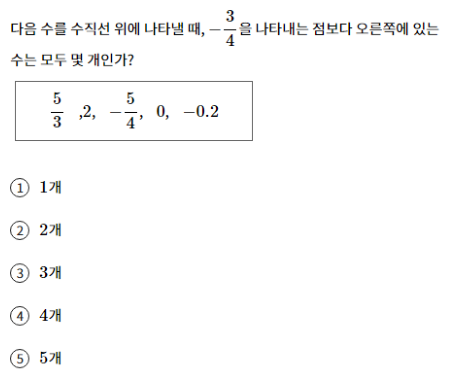

In [94]:
plt.imshow(cropedImage)
plt.axis('off')
plt.show()

## Lambda function

In [ ]:
import json
import boto3
import botocore

BUCKET_NAME = 'file-upload-system-s3'
DIR_NAME = 'data/'
FILE_NAME = 'test.txt'
KEY = DIR_NAME + FILE_NAME

s3 = boto3.client('s3')

def lambda_handler(event, context):
    data = s3.get_object(Bucket = BUCKET_NAME, Key = KEY)
    res = data['Body'].read()
    print(res)
    return {
        'statusCode': 200,
        'body': json.dumps(res.decode('UTF-8'))
    }

Lambda+Trigger function으로 해야할듯..
아니면  SNS SQS?